<a href="https://colab.research.google.com/github/Gamearonx/Pre-Boot-Camp-2/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Random Forest Modeling Script for Stroke Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# 1. Load and Explore Dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
print("Initial Data Shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

Initial Data Shape: (5110, 12)
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame

In [3]:
# 2. Handle Missing Values
print("Missing values:\n", df.isnull().sum())
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

Missing values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<ipython-input-3-015992feed63>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [4]:
# 3. Encode Categorical Variables
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

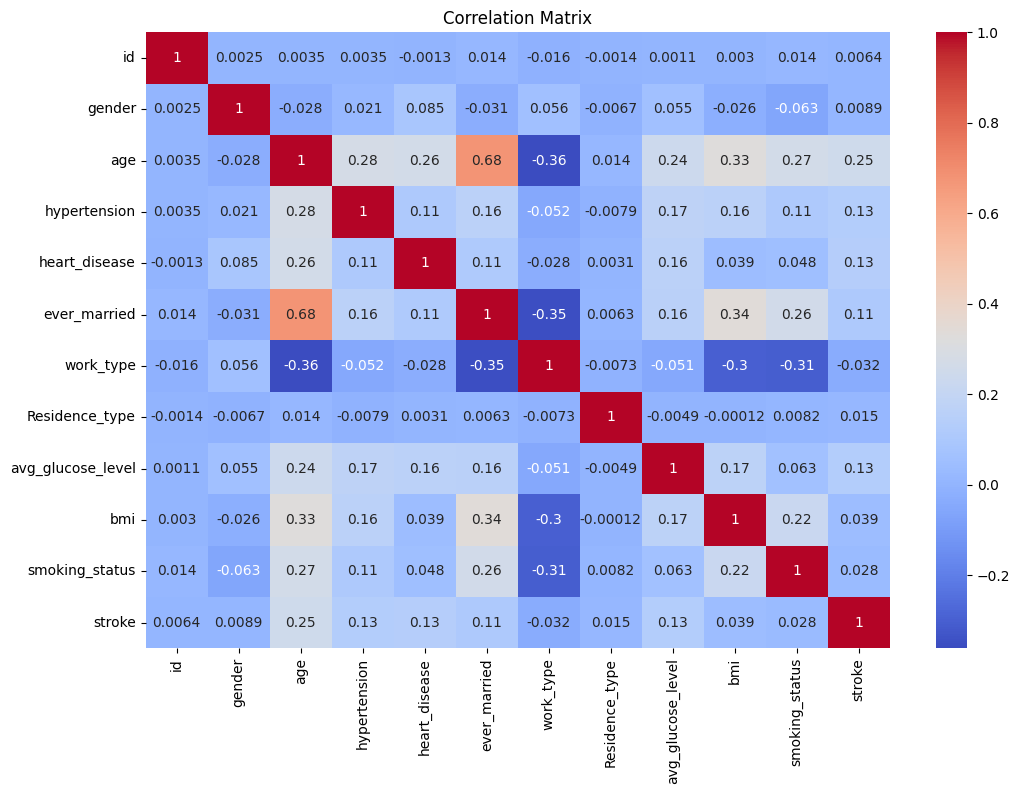

In [5]:
# 4. Correlation and Visualization (optional but good for EDA)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [6]:
# 5. Prepare Data for Modeling
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
# 6. Build Initial Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=4, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533

Confusion Matrix:
 [[1458    0]
 [  75    0]]
Accuracy Score: 0.9510763209393346


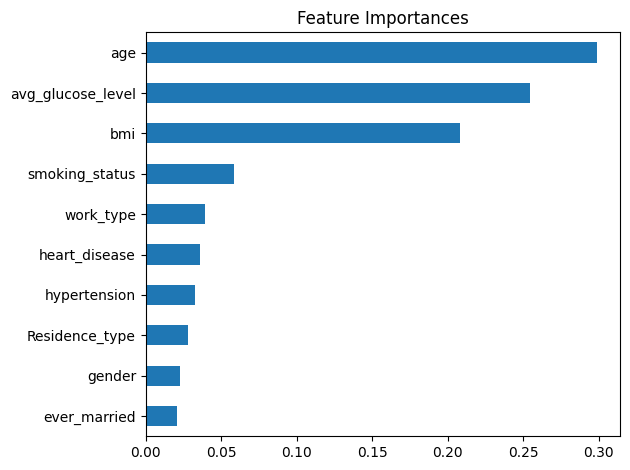

In [8]:
# 7. Evaluate the Model
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.tight_layout()
plt.show()

In [9]:
# 8. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}


In [10]:
# Final Evaluation with Best Model
y_best_pred = best_model.predict(X_test)
print("Optimized Classification Report:\n", classification_report(y_test, y_best_pred))
print("Optimized Accuracy Score:", accuracy_score(y_test, y_best_pred))

# Cross-validation score
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.33      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.64      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533

Optimized Accuracy Score: 0.9504240052185258
Cross-validation Accuracy Scores: [0.94911937 0.94911937 0.9481409  0.94911937 0.95107632]
Mean CV Accuracy: 0.9493150684931507
